1. 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율을 구해 순위 비교
2. 인구대비 cctv의 평균치를 확인하고 cctv가 과하게 부족한 구를 확인
3. 고령자 대비 cctv 비율
4. 외국인 대비 cctv 비율

- 사용 데이터 
    - 서울시 지자체별 cctv 현황 data/01. CCTV_in_Seoul.csv
    - 서울시 지자체별 인구 현황 data/01.population_in_Seoul.xls


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 데이터 read 기본 정리

In [2]:
# cctv 데이터 읽어오기
# pandas reasd_csv(' 파일 경로', encoding='인코딩명')
# 데이터에 한글이 포함되어 있는 경우 : 인코딩 방식을 설정

CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv')

CCTV_Seoul.shape
CCTV_Seoul.head(5)
CCTV_Seoul.tail(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [5]:
# column 명 확인 (df.columns)

CCTV_Seoul.columns
CCTV_Seoul.columns[0]
CCTV_Seoul.index

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

'기관명'

RangeIndex(start=0, stop=25, step=1)

In [6]:
# 기관명 -> 구별 열이름 변경
#컬럼명 변경 : df.rename(columns = {바꿀위치: 변경이름}) (원본 반영X)
#df.rename(columns = {바꿀위치: 변경이름}, inplace=True) (원본 변경)

CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0]:'자치구'}, inplace=True)
CCTV_Seoul.head()

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [7]:
# 인구 데이터 읽어오기
pop_Seoul = pd.read_excel('../data/01.population_in_Seoul.xls')
pop_Seoul.shape
pop_Seoul.head(5)
pop_Seoul.tail(5)

(29, 14)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
24,2017.1/4,서초구,173856,450310,216264,234046,445994,214036,231958,4316,2228,2088,2.57,51733
25,2017.1/4,강남구,234107,570500,273301,297199,565550,270726,294824,4950,2575,2375,2.42,63167
26,2017.1/4,송파구,259883,667483,325040,342443,660584,321676,338908,6899,3364,3535,2.54,72506
27,2017.1/4,강동구,179676,453233,225427,227806,449019,223488,225531,4214,1939,2275,2.5,54622
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#필요 data 만 가져오기, 자치구, 전체인구수,한국인,외국인,고령자(B,D,G,J,N)
#2행을 skip하고 3행을 header 처리

pop_Seoul = pd.read_excel('../data/01.population_in_Seoul.xls', header = 2, usecols = 'B,D,G,J,N')

pop_Seoul.head(5)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
# 컬럼명 변경
#1:인구수
#2:한국인
#3:외국인
#4:고령자

pop_Seoul.rename(columns={pop_Seoul.columns[1]:'인구수',
                          pop_Seoul.columns[2]:'한국인',
                          pop_Seoul.columns[3]:'외국인', 
                          pop_Seoul.columns[4]:'고령자'}, inplace = True)

pop_Seoul.head(5)

,자치구,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 데이터 기본 정보 확인

In [10]:
#개요확인
CCTV_Seoul.info()
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   자치구        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구     26 non-null     object 
 1   인구수     26 non-null     float64
 2   한국인     26 non-null     float64
 3   외국인     26 non-null     float64
 4   고령자     26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [11]:
#기본 통계량 확인
CCTV_Seoul.describe()
pop_Seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1515.320000,764.760000,159.480000,205.200000,385.880000
std,616.774656,415.510257,104.132976,137.877059,182.479981
min,825.000000,238.000000,21.000000,30.000000,81.000000
25%,1010.000000,464.000000,78.000000,103.000000,292.000000
50%,1327.000000,573.000000,142.000000,184.000000,377.000000
75%,1884.000000,1070.000000,218.000000,269.000000,467.000000
max,3238.000000,1843.000000,430.000000,584.000000,932.000000


,인구수,한국인,외국인,고령자
count,2.600000e+01,2.600000e+01,26.000000,2.600000e+01
mean,7.844311e+05,7.636129e+05,20818.153846,1.016506e+05
std,1.924156e+06,1.873421e+06,51598.169516,2.491801e+05
min,1.332400e+05,1.243120e+05,2017.000000,2.076400e+04
25%,3.348055e+05,3.316718e+05,4489.000000,4.831200e+04
50%,4.135115e+05,4.051690e+05,9079.500000,5.439750e+04
75%,4.907855e+05,4.864445e+05,14901.500000,6.431075e+04
max,1.019760e+07,9.926968e+06,270636.000000,1.321458e+06


In [12]:
#판다스 실수 출력 형식 변경 코드 (지수 표현)
pd.reset_option('display.float_format') 

In [13]:
#판다스 실수 출력 형식 변경 코드 (일반 실수 표현)
pd.options.display.float_format = '{:.1f}'.format 

In [14]:
#기본 통계량 확인
CCTV_Seoul.describe()
pop_Seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.0,25.0,25.0,25.0,25.0
mean,1515.3,764.8,159.5,205.2,385.9
std,616.8,415.5,104.1,137.9,182.5
min,825.0,238.0,21.0,30.0,81.0
25%,1010.0,464.0,78.0,103.0,292.0
50%,1327.0,573.0,142.0,184.0,377.0
75%,1884.0,1070.0,218.0,269.0,467.0
max,3238.0,1843.0,430.0,584.0,932.0


,인구수,한국인,외국인,고령자
count,26.0,26.0,26.0,26.0
mean,784431.1,763612.9,20818.2,101650.6
std,1924156.4,1873421.3,51598.2,249180.1
min,133240.0,124312.0,2017.0,20764.0
25%,334805.5,331671.8,4489.0,48312.0
50%,413511.5,405169.0,9079.5,54397.5
75%,490785.5,486444.5,14901.5,64310.8
max,10197604.0,9926968.0,270636.0,1321458.0


## CCTV 현황 확인

In [15]:
# 소계 컬럼을 활용해서 설치대수가 많은 구와 적은 구를 확인 (5개 구를 확인)
# 소계를 기준으로 정렬 후에 head() 이용해서 확인
# 설치 대수가 적은 5개 구역

CCTV_Seoul.sort_values(by='소계').head(5)
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

## 강남구가 가장 많은 CCTV 보유, 양천구, 서초구 순으로 나타남


,자치구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


## Data 상 최근 3개년 (2014~2016)동안 cctv가 얼마나 증가
- 각 연도별 cctv 대수는 해당 년도에 설치한 대수를 의미
- CCTV_Seoul['최근증가율']=(2014+2015+2016)/2013

In [16]:
CCTV_Seoul.head(5)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [17]:
CCTV_Seoul['최근 증가율'] = (CCTV_Seoul['2014년']+
                        CCTV_Seoul['2015년'] +
                        CCTV_Seoul['2016년']) / CCTV_Seoul['2013년도 이전'] * 100


In [18]:
CCTV_Seoul.head(5)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.6
1,강동구,1010,379,99,155,377,166.5
2,강북구,831,369,120,138,204,125.2
3,강서구,911,388,258,184,81,134.8
4,관악구,2109,846,260,390,613,149.3


In [19]:
CCTV_Seoul.sort_values(by='최근 증가율').head(3)
CCTV_Seoul.sort_values(by='최근 증가율', ascending=False).head(3)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
18,양천구,2482,1843,142,30,467,34.7
13,서대문구,1254,844,50,68,292,48.6
20,용산구,2096,1368,218,112,398,53.2


,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.9
9,도봉구,825,238,159,42,386,246.6
12,마포구,980,314,118,169,379,212.1


In [20]:
# 서울시 인구수 정리
pop_Seoul.head(5)

,자치구,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [21]:
# 첫행 삭제 필요
# 삭제 명령어 : del => 원본반영 (열삭제 주로 사용)
# 삭제 명령어 : drop => 원본반영 (행삭제 주로 사용) (inplace 필요)

In [22]:
pop_Seoul.drop([0], inplace=True)

In [23]:
pop_Seoul.head(5)
len(pop_Seoul)

,자치구,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


26

In [24]:
# 각 자치구 데이터가 중복되지 않았는지 확인 : 구별 컬럼의 원소를 중복을 제거하고 출력
#unique()

pop_Seoul.자치구.unique()
len(pop_Seoul.자치구.unique())
len(pop_Seoul.자치구)

len(pop_Seoul['자치구'].unique())
len(pop_Seoul['자치구'])

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

26

26

26

26

In [25]:
#구별 원소값에 nan 여부 확인 - isnull()
#조건식을 이용해서 인덱싱을 진행하면 null이 포함되어 있는 행을 반환받을 수 있음

#pop_Seoul['자치구'].isnull()
pop_Seoul[pop_Seoul['자치구'].isnull()]
#26행 삭제

,자치구,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [26]:
pop_Seoul.drop([26], inplace=True)

In [27]:
len(pop_Seoul)
pop_Seoul.tail(5)

25

,자치구,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


## 인구 데이터를 활용한 가공필드
- 전체 인구수 대비 외국인 비율 계산 : pop_Seoul['외국인 비율']
- 전체 인구수 대비 고령자 비율 계산 : pop_Seoul['고령자 비율']

In [28]:
pop_Seoul.head(5)

,자치구,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [29]:
pop_Seoul['외국인 비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자 비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

In [30]:
pop_Seoul.head(5)
pop_Seoul.tail(5)

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.7,15.6
2,중구,133240.0,124312.0,8928.0,20764.0,6.7,15.6
3,용산구,244203.0,229456.0,14747.0,36231.0,6.0,14.8
4,성동구,311244.0,303380.0,7864.0,39997.0,2.5,12.9
5,광진구,372164.0,357211.0,14953.0,42214.0,4.0,11.3


,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
21,관악구,525515.0,507203.0,18312.0,68082.0,3.5,13.0
22,서초구,450310.0,445994.0,4316.0,51733.0,1.0,11.5
23,강남구,570500.0,565550.0,4950.0,63167.0,0.9,11.1
24,송파구,667483.0,660584.0,6899.0,72506.0,1.0,10.9
25,강동구,453233.0,449019.0,4214.0,54622.0,0.9,12.1


In [31]:
# 인구가 많은 5개 구역
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.0,10.9
16,강서구,603772.0,597248.0,6524.0,72548.0,1.1,12.0
23,강남구,570500.0,565550.0,4950.0,63167.0,0.9,11.1
11,노원구,569384.0,565565.0,3819.0,71941.0,0.7,12.6
21,관악구,525515.0,507203.0,18312.0,68082.0,3.5,13.0


In [32]:
# 외국인 비율 높은 5개 구
pop_Seoul.sort_values(by='외국인 비율', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.7,13.0
18,금천구,255082.0,236353.0,18729.0,32970.0,7.3,12.9
17,구로구,447874.0,416487.0,31387.0,56833.0,7.0,12.7
2,중구,133240.0,124312.0,8928.0,20764.0,6.7,15.6
3,용산구,244203.0,229456.0,14747.0,36231.0,6.0,14.8


In [33]:
# 외국인 많은 5개 구
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.7,13.0
17,구로구,447874.0,416487.0,31387.0,56833.0,7.0,12.7
18,금천구,255082.0,236353.0,18729.0,32970.0,7.3,12.9
21,관악구,525515.0,507203.0,18312.0,68082.0,3.5,13.0
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.2,14.7


In [34]:
# 고령자 비율이 높은 5개 구
pop_Seoul.sort_values(by='고령자 비율', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.1,16.6
1,종로구,162820.0,153589.0,9231.0,25425.0,5.7,15.6
2,중구,133240.0,124312.0,8928.0,20764.0,6.7,15.6
3,용산구,244203.0,229456.0,14747.0,36231.0,6.0,14.8
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.7,14.7


In [35]:
# 고령자 비율이 높은 5개 구
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.1,12.0
24,송파구,667483.0,660584.0,6899.0,72506.0,1.0,10.9
12,은평구,494388.0,489943.0,4445.0,72334.0,0.9,14.6
11,노원구,569384.0,565565.0,3819.0,71941.0,0.7,12.6
21,관악구,525515.0,507203.0,18312.0,68082.0,3.5,13.0


## 분석 목적 : 각 지자체 별 인구수 대비 CCTV 대수의 적정성을 확인
- 데이터를 병합해서 확인
- key로 사용할 공통 열이 존재해야 함
- 두 데이터프레임에 '자치구' 공통열이 존재 : 키로 사용
- 두 데이터프레임에 행은 25개 구로 동일하게 data가 있으니 how는 어떤걸 사용되 됨

In [36]:
CCTV_Seoul.head(5)
pop_Seoul.head(5)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.6
1,강동구,1010,379,99,155,377,166.5
2,강북구,831,369,120,138,204,125.2
3,강서구,911,388,258,184,81,134.8
4,관악구,2109,846,260,390,613,149.3


,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.7,15.6
2,중구,133240.0,124312.0,8928.0,20764.0,6.7,15.6
3,용산구,244203.0,229456.0,14747.0,36231.0,6.0,14.8
4,성동구,311244.0,303380.0,7864.0,39997.0,2.5,12.9
5,광진구,372164.0,357211.0,14953.0,42214.0,4.0,11.3


In [37]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='자치구')
data_result.head(5)
data_result.tail(5)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,1292,430,584,932,150.6,570500.0,565550.0,4950.0,63167.0,0.9,11.1
1,강동구,1010,379,99,155,377,166.5,453233.0,449019.0,4214.0,54622.0,0.9,12.1
2,강북구,831,369,120,138,204,125.2,330192.0,326686.0,3506.0,54813.0,1.1,16.6
3,강서구,911,388,258,184,81,134.8,603772.0,597248.0,6524.0,72548.0,1.1,12.0
4,관악구,2109,846,260,390,613,149.3,525515.0,507203.0,18312.0,68082.0,3.5,13.0


,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
20,용산구,2096,1368,218,112,398,53.2,244203.0,229456.0,14747.0,36231.0,6.0,14.8
21,은평구,2108,1138,224,278,468,85.2,494388.0,489943.0,4445.0,72334.0,0.9,14.6
22,종로구,1619,464,314,211,630,248.9,162820.0,153589.0,9231.0,25425.0,5.7,15.6
23,중구,1023,413,190,72,348,147.7,133240.0,124312.0,8928.0,20764.0,6.7,15.6
24,중랑구,916,509,121,177,109,80.0,414503.0,409882.0,4621.0,56774.0,1.1,13.7


In [38]:
# 필요 없는 열(column) 제거

#병합 후 사용하지 않을 컬럼은 삭제
#열 삭제시 del 일 많이 사용함
#cctv 데이터의 2013-2016필드 삭제

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [39]:
data_result.head(5)

,자치구,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,150.6,570500.0,565550.0,4950.0,63167.0,0.9,11.1
1,강동구,1010,166.5,453233.0,449019.0,4214.0,54622.0,0.9,12.1
2,강북구,831,125.2,330192.0,326686.0,3506.0,54813.0,1.1,16.6
3,강서구,911,134.8,603772.0,597248.0,6524.0,72548.0,1.1,12.0
4,관악구,2109,149.3,525515.0,507203.0,18312.0,68082.0,3.5,13.0


## 문자 인덱스 시각화할 경우 효과적
- '자치구' 컬럼을 인덱스로 설정(df.set_index(컬럼명, inplace=True))

In [40]:
data_result.set_index('자치구', inplace=True)


In [41]:
data_result.head(5)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,3238,150.6,570500.0,565550.0,4950.0,63167.0,0.9,11.1
강동구,1010,166.5,453233.0,449019.0,4214.0,54622.0,0.9,12.1
강북구,831,125.2,330192.0,326686.0,3506.0,54813.0,1.1,16.6
강서구,911,134.8,603772.0,597248.0,6524.0,72548.0,1.1,12.0
관악구,2109,149.3,525515.0,507203.0,18312.0,68082.0,3.5,13.0


## cctv와 인구 현황에 대한 시각화 작업

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

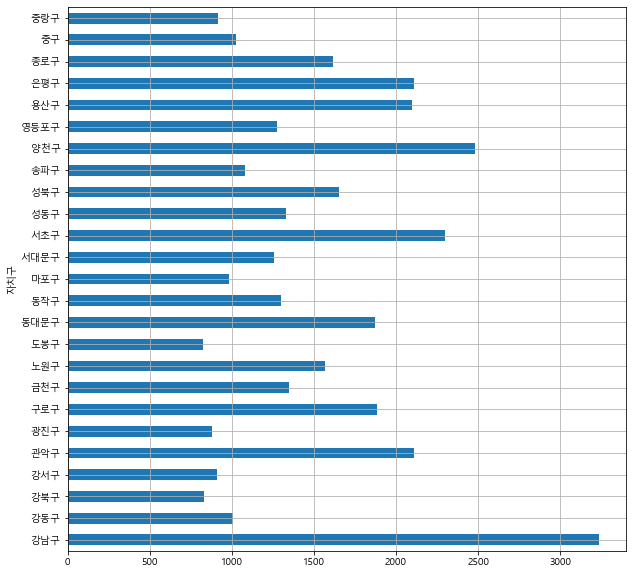

In [42]:
# 각 구별로 cctv 대수가 얼마나 차이가 나는지 시각화 통해서 확인
plt.figure(figsize=(10,10))
data_result['소계'].plot(kind='barh', grid=True)

<Figure size 720x720 with 0 Axes>

<BarContainer object of 25 artists>

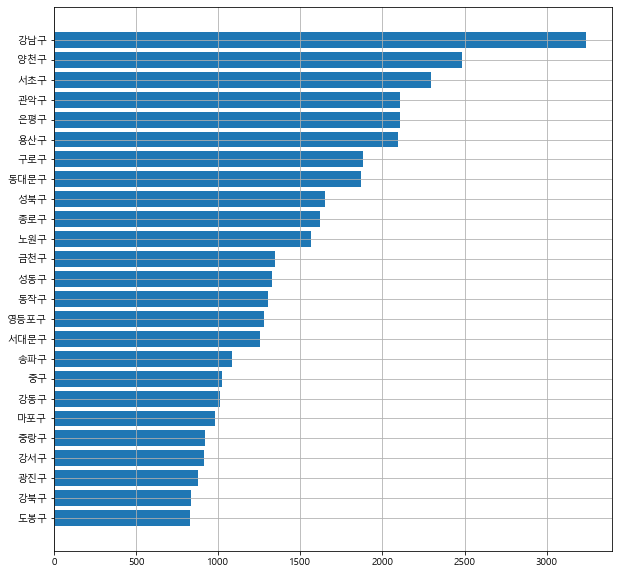

In [43]:
plt.figure(figsize=(10,10))
sort_data = data_result['소계'].sort_values()
plt.barh(sort_data.index, sort_data)
plt.grid()

## 인구수와 CCTV 대수를 비교하는 scatter(분산) 그래프 그리기

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCCTV')

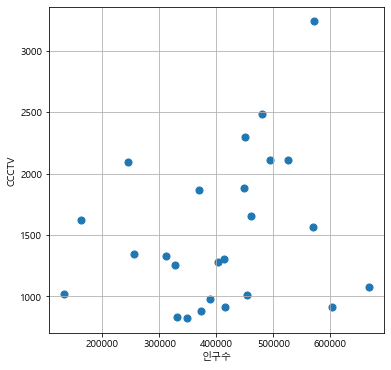

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50) #소계 = CCTV 대수

plt.xlabel('인구수')
plt.ylabel('CCCTV')

plt.grid()

plt.show()

## 최소 오차 직석 그리기

In [45]:
#인구수와 CCTV수를 이용해 최소오차 직선식 계수 구하기
# 1차 직선을 그리기 위한 방정식 계수 찾기
# 인구수(x) 570,500,53233일때 CCTV대수(y) 3238,1010의 두 점이 있을때 직선을 그리기 위한
# 1차 함수의 계수를 계산해주는 함수 - 기울기와 절편을 찾아주는 함수
# polyfit(x,y,n)
# y에 대한 x의 그래프에서 오차가 가장 적은 
# n차 방정식 계수 반환
# poly1d(방정식계수) - 계수를 이용해서 방정식함수로 생성


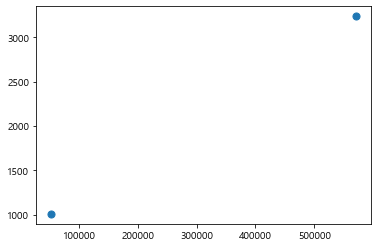

In [46]:
x = [570500, 53233]
y = [3238, 1010]

plt.scatter(x,y,s=50)

In [47]:
form = np.polyfit(x,y,1) # 전달 계수 (2점으로 방적식을 세움)
form
f_form = np.poly1d(form)
f_form

array([4.30725331e-03, 7.80711984e+02])

poly1d([4.30725331e-03, 7.80711984e+02])

In [48]:
fx = np.linspace(100000, 700000, 100)
fy = f_form(fx)

fx
fy

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

array([1211.43731574, 1237.54188128, 1263.64644682, 1289.75101236,
       1315.8555779 , 1341.96014344, 1368.06470898, 1394.16927452,
       1420.27384006, 1446.3784056 , 1472.48297114, 1498.58753668,
       1524.69210221, 1550.79666775, 1576.90123329, 1603.00579883,
       1629.11036437, 1655.21492991, 1681.31949545, 1707.42406099,
       1733.52862653, 1759.63319207, 1785.73775761, 1811.84232315,
       1837.94688869, 1864.05145423, 1890.15601977, 1916.26058531,
       1942.36515085, 1968.46971639, 1994.57428193, 2020.67884747,
       2046.78341301, 2072.88797855, 2098.99254409, 2125.09710963,
       2151.20167517, 2177.30624071, 2203.41080625, 2229.51537179,
       2255.61993733, 2281.72450287, 2307.82906841, 2333.93363395,
       2360.03819949, 2386.14276503, 2412.24733057, 2438.3518961 ,
       2464.45646164, 2490.56102718, 2516.66559272, 2542.77015826,
       2568.8747238 , 2594.97928934, 2621.08385488, 2647.18842042,
       2673.29298596, 2699.3975515 , 2725.50211704, 2751.60668

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

<function matplotlib.pyplot.show(close=None, block=None)>

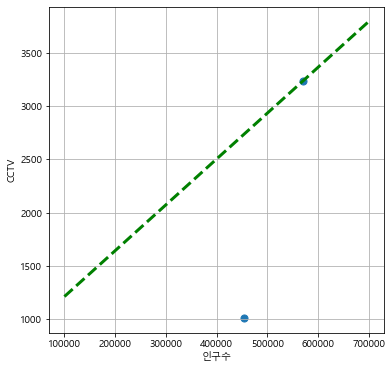

In [49]:
x = [570500, 453233]
y = [3238, 1010]

plt.figure(figsize=(6,6))
plt.scatter(x,y,s=50)

plt.plot(fx,fy,ls='dashed',lw=3,c='g')

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

plt.show

In [50]:
# 수집 데이터를 활용해서 대표 직성 방정식 구하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1
f1 = np.poly1d(fp1) #전달계수 함수 생성

array([1.15151285e-03, 1.04561312e+03])

In [51]:
fx = np.linspace(100000,700000,100)
#fx
fx[:5]
fy=f1(fx)
fy[:5]

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242])

array([1160.76440422, 1167.74326996, 1174.72213569, 1181.70100143,
       1188.67986717])

In [52]:
fx[95:]
fy[95:]

array([675757.57575758, 681818.18181818, 687878.78787879, 693939.39393939,
       700000.        ])

array([1823.75664927, 1830.735515  , 1837.71438074, 1844.69324648,
       1851.67211222])

<Figure size 720x720 with 0 Axes>

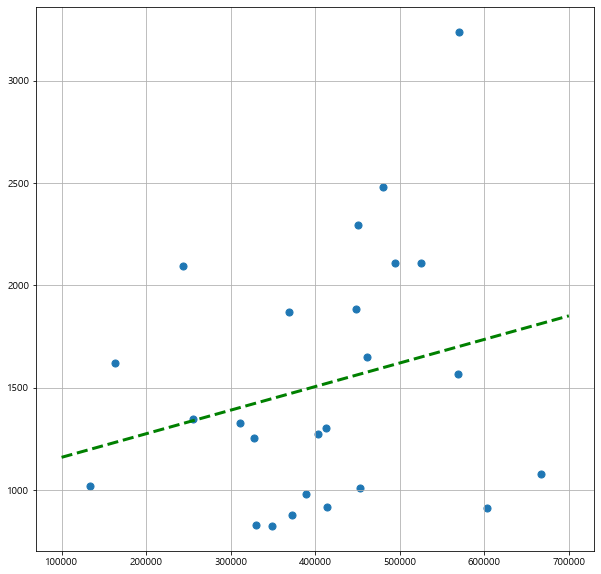

In [53]:
## 최종 그래프
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)

plt.plot(fx,fy,ls='dashed',lw=3,c='g')

plt.grid()

plt.show()

## 위 그래프의 직선의 의미
- 인구수가 400000일때 적당한 cctv 대수는 1500대 정도라는 것을 의미함

- 선근처에 분포하고 있으면 적당한 대수를 갖고 있고
- 선에서 멀어질 수록 cctv 대수가 너무 많거나 너무 적은 걸 의미한다.- 위 그래프의 직선의 의미
- 인구수가 400000일때 적당한 cctv 대수는 1500대 정도라는 것을 의미함

- 선근처에 분포하고 있으면 적당한 대수를 갖고 있고
- 선에서 멀어질 수록 cctv 대수가 너무 많거나 너무 적은 걸 의미한다.

In [54]:
# 각 구별로 적절한 CCTV 수를 계산
# 각 구별 인구수를 함수에 대입해서 y결과값 확인

f1(data_result['인구수'])

array([1702.55119857, 1567.51674158, 1425.83344942, 1740.86433401,
       1650.75039317, 1474.16474662, 1561.34578424, 1339.34331951,
       1701.26611024, 1447.08346749, 1471.09251034, 1520.63519906,
       1494.29894874, 1422.34551701, 1564.15086953, 1404.014584  ,
       1576.7599352 , 1814.22836898, 1598.31395267, 1509.65552407,
       1326.81601125, 1614.90725279, 1233.10244125, 1199.04069124,
       1522.91864903])

In [55]:
data_result['소계'] - f1(data_result['인구수'])

자치구
강남구    1535.4
강동구    -557.5
강북구    -594.8
강서구    -829.9
관악구     458.2
광진구    -596.2
구로구     322.7
금천구       8.7
노원구    -135.3
도봉구    -622.1
동대문구    398.9
동작구    -218.6
마포구    -514.3
서대문구   -168.3
서초구     732.8
성동구     -77.0
성북구      74.2
송파구    -733.2
양천구     883.7
영등포구   -232.7
용산구     769.2
은평구     493.1
종로구     385.9
중구     -176.0
중랑구    -606.9
Name: 소계, dtype: float64

In [56]:
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,3238,150.6,570500.0,565550.0,4950.0,63167.0,0.9,11.1
강동구,1010,166.5,453233.0,449019.0,4214.0,54622.0,0.9,12.1
강북구,831,125.2,330192.0,326686.0,3506.0,54813.0,1.1,16.6
강서구,911,134.8,603772.0,597248.0,6524.0,72548.0,1.1,12.0
관악구,2109,149.3,525515.0,507203.0,18312.0,68082.0,3.5,13.0


In [57]:
# 오차를 절대값으로 계산한 후 오차열을 기준으로 내림차수 정렬
# 상위 10개 구만 추출

#CCTV 부족 또는 많은 상태를 표현하는 ['오차'] 필드 생성

data_result['오차'] = np.abs(data_result['소계'] - data_result['인구수'])

data_result.head()


,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,오차
자치구,,,,,,,,,
강남구,3238,150.6,570500.0,565550.0,4950.0,63167.0,0.9,11.1,567262.0
강동구,1010,166.5,453233.0,449019.0,4214.0,54622.0,0.9,12.1,452223.0
강북구,831,125.2,330192.0,326686.0,3506.0,54813.0,1.1,16.6,329361.0
강서구,911,134.8,603772.0,597248.0,6524.0,72548.0,1.1,12.0,602861.0
관악구,2109,149.3,525515.0,507203.0,18312.0,68082.0,3.5,13.0,523406.0


In [58]:
# 오차 상위 10개
df_sort = data_result.sort_values(by='오차', ascending=False).head(10)

df_sort


,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,오차
자치구,,,,,,,,,
송파구,1081,104.3,667483.0,660584.0,6899.0,72506.0,1.0,10.9,666402.0
강서구,911,134.8,603772.0,597248.0,6524.0,72548.0,1.1,12.0,602861.0
노원구,1566,188.9,569384.0,565565.0,3819.0,71941.0,0.7,12.6,567818.0
강남구,3238,150.6,570500.0,565550.0,4950.0,63167.0,0.9,11.1,567262.0
관악구,2109,149.3,525515.0,507203.0,18312.0,68082.0,3.5,13.0,523406.0
은평구,2108,85.2,494388.0,489943.0,4445.0,72334.0,0.9,14.6,492280.0
양천구,2482,34.7,479978.0,475949.0,4029.0,52975.0,0.8,11.0,477496.0
성북구,1651,63.6,461260.0,449773.0,11487.0,64692.0,2.5,14.0,459609.0
강동구,1010,166.5,453233.0,449019.0,4214.0,54622.0,0.9,12.1,452223.0


## 차가 큰 상위 10개 도시 표시하기
- 그래프에 글자 출력 : plt.text(x,y,text,fontsize)

- 점보다약간 오른쪽 아래에 출력되도록 좌표를 변경한 후 실행
- 10개를 출력 for 문을 이용

In [59]:
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

Text(687507.49, 1081, '송파구')

Text(621885.16, 911, '강서구')

Text(586465.52, 1566, '노원구')

Text(587615.0, 3238, '강남구')

Text(541280.4500000001, 2109, '관악구')

Text(509219.64, 2108, '은평구')

Text(494377.34, 2482, '양천구')

Text(475097.8, 1651, '성북구')

Text(466829.99, 1010, '강동구')

Text(463819.3, 2297, '서초구')

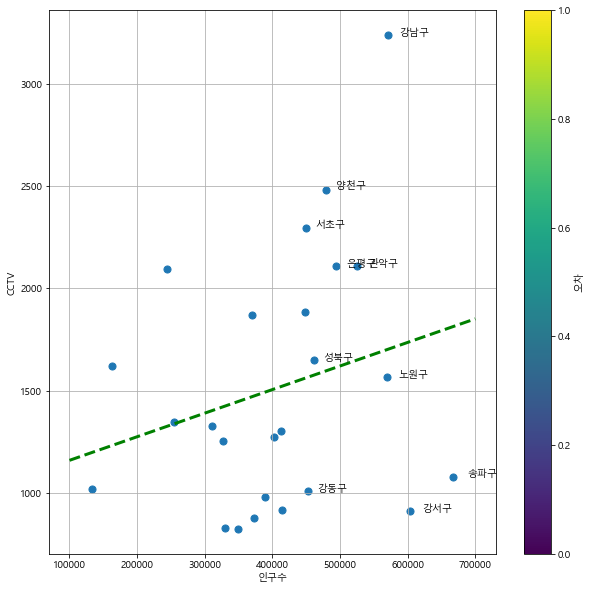

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx,fy,ls='dashed',lw=3,c='g')



plt.xlabel('인구수')
plt.ylabel('CCTV')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.03,
            df_sort['소계'][n],
            df_sort.index[n])


plt.colorbar(label='오차')


plt.grid()
plt.show()